In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from os import listdir
from os.path import isfile, join

In [2]:
phm_folder= "../datasets/phm/phm-2012-wt/"

path_X_train_Bearing1_1 = phm_folder+'X_train_Bearing1_1.npy' 
path_X_train_Bearing1_2 = phm_folder+'X_train_Bearing1_2.npy'
path_X_train_Bearing2_1 = phm_folder+'X_train_Bearing2_1.npy' 
path_X_train_Bearing2_2 = phm_folder+'X_train_Bearing2_2.npy' 
path_X_train_Bearing3_1 = phm_folder+'X_train_Bearing3_1.npy' 
path_X_train_Bearing3_2 = phm_folder+'X_train_Bearing3_2.npy' 


path_Y_train_Bearing1_1 = phm_folder+'Y_train_Bearing1_1.npy' 
path_Y_train_Bearing1_2 = phm_folder+'Y_train_Bearing1_2.npy'
path_Y_train_Bearing2_1 = phm_folder+'Y_train_Bearing2_1.npy' 
path_Y_train_Bearing2_2 = phm_folder+'Y_train_Bearing2_2.npy' 
path_Y_train_Bearing3_1 = phm_folder+'Y_train_Bearing3_1.npy' 
path_Y_train_Bearing3_2 = phm_folder+'Y_train_Bearing3_2.npy' 

In [3]:
X_train_Bearing1_1 = np.load(path_X_train_Bearing1_1)
X_train_Bearing1_2 = np.load(path_X_train_Bearing1_2)
X_train_Bearing2_1 = np.load(path_X_train_Bearing2_1)
X_train_Bearing2_2 = np.load(path_X_train_Bearing2_2)
X_train_Bearing3_1 = np.load(path_X_train_Bearing3_1)
X_train_Bearing3_2 = np.load(path_X_train_Bearing3_2)

Y_train_Bearing1_1 = np.load(path_Y_train_Bearing1_1)
Y_train_Bearing1_2 = np.load(path_Y_train_Bearing1_2)
Y_train_Bearing2_1 = np.load(path_Y_train_Bearing2_1)
Y_train_Bearing2_2 = np.load(path_Y_train_Bearing2_2)
Y_train_Bearing3_1 = np.load(path_Y_train_Bearing3_1)
Y_train_Bearing3_2 = np.load(path_Y_train_Bearing3_2)

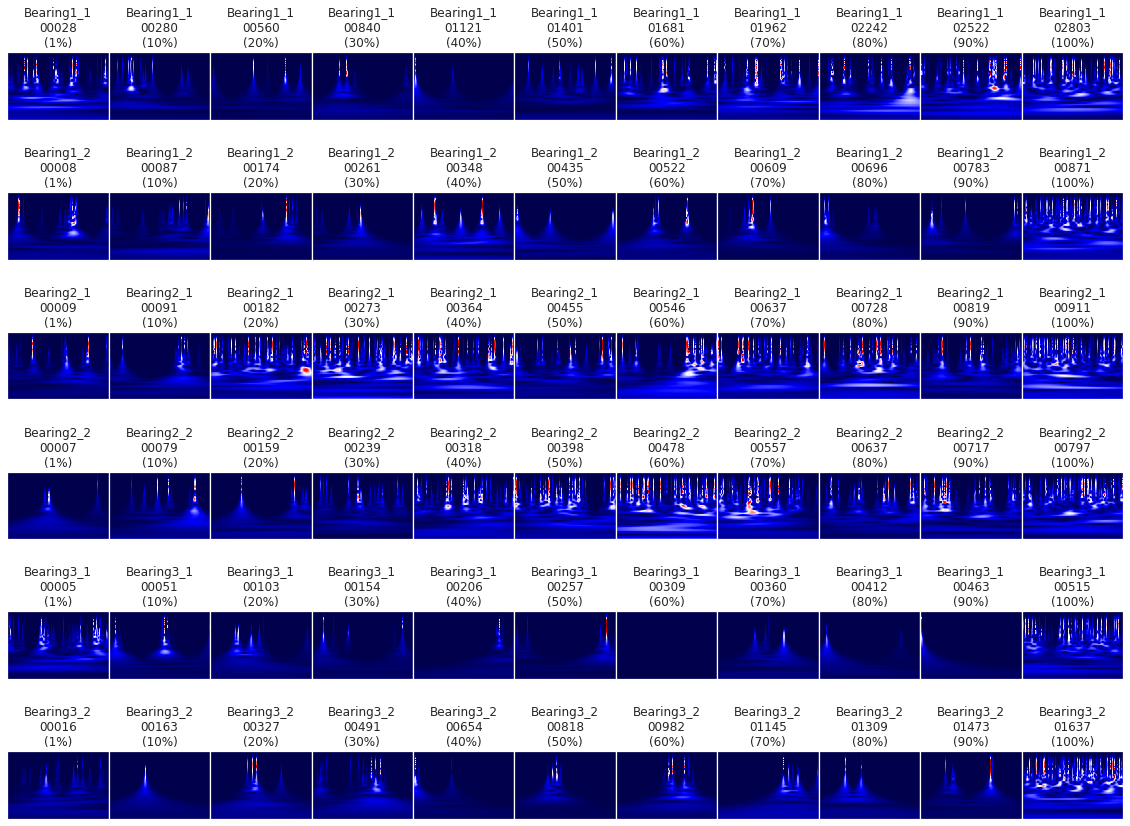

In [6]:
# methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#            'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#            'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

data_list = ['1_1', '1_2', '2_1', '2_2', '3_1', '3_2']
range_list = ['1', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
data_name = 'X_train_Bearing'

n_rows = len(data_list)
n_cols = len(range_list)
methods = list(range(0, n_rows*n_cols))
# Fixing random state for reproducibility
# np.random.seed(19680801)

# grid = np.random.rand(4, 4)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.2, wspace=0)
i=0
for ax, interp_method in zip(axes.flat, methods):
    motor = 'Bearing'+data_list[int(i/n_cols)]
    image_path = '../datasets/phm/phm-2012-wt-image/' + motor + '/'
    
    onlyfiles = [f for f in listdir(image_path) if isfile(join(image_path, f))]
    onlyfiles.sort()
    
    index = int(len(onlyfiles) * int(range_list[int(i%n_cols)]) / 100)
    index = f'{index:05}'
    filename = motor+'_acc_'+index+'.png'
#     print(image_path+filename)

    img=mpimg.imread(image_path+filename)
    ax.imshow(img)
#     ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(motor+'\n'+index + '\n(' +range_list[int(i%n_cols)]+ '%)')
    
    i=i+1

plt.savefig('wt_contour.png', dpi=300)
plt.show()

